### Ch13 Figure3

In [1]:
# The data shows that in the summer months, people are more likely to convert their wish list items to purchases. That's just the raw data, but it’s not a very interesting story. Why are people interested in shoes in the winter, but waiting until the summer to buy them?

data = []

for i in range(1000):
    
    month = rd.randint(1,12)
    days_in_cart = rd.randint(0,60)
    times_in_cart = rd.randint(1,10)
    if rd.random() <= .95:
        buy = 0
    else:
        buy = 1
        
    if 6<=month<=9:
        # summer
        if rd.random() >= .6:
            days_in_cart = rd.randint(20,60)
            times_in_cart = rd.randint(4,10)
            buy = 1
        else:
            buy = 0
    
    data.append([i, month, buy, days_in_cart, times_in_cart])
    
df = pd.DataFrame(data, columns=['id', 'month', 'buy', 'days-in-cart', 'times-in-cart'])
# df.to_csv('csv_output/ch13_fig3.csv', index=False)
df = pd.read_csv('csv_output/ch13_fig3.csv')
df.head()

,id,month,buy,days-in-cart,times-in-cart
0,0,8,0,11,3
1,1,4,0,23,7
2,2,10,0,14,10
3,3,8,0,38,4
4,4,8,0,44,9


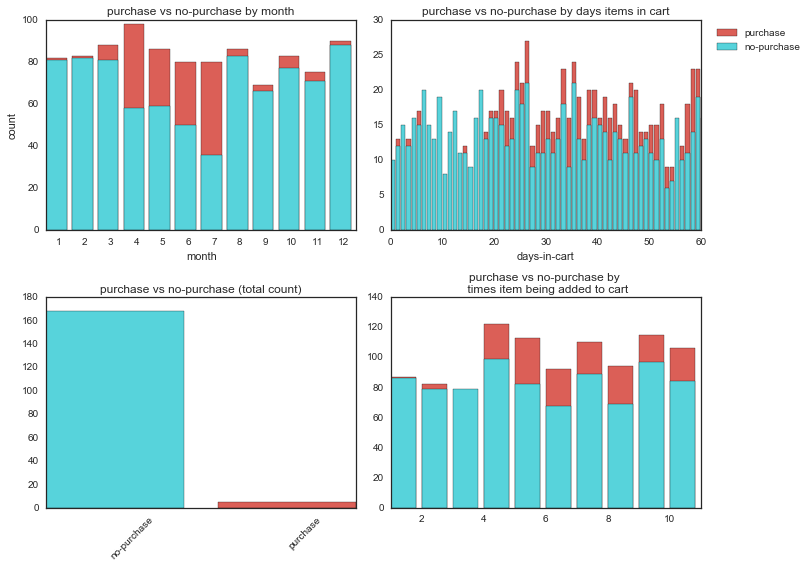

In [2]:
df = pd.read_csv('csv_output/ch13_fig3.csv')

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(2,2, figsize=(10,8))
ax0, ax1, ax2, ax3 = ax.flat
colors = sns.color_palette('hls', 8)

# f = sns.PairGrid(df.iloc[:,1:], hue="buy", palette="husl", size=3)
# f.map(plt.hist)
df1 = df.groupby(['month', 'buy']).id.count().reset_index()
df2 = df.groupby(['days-in-cart', 'buy']).id.count().reset_index()
df3 = df2[df2.buy==0].merge(df2[df2.buy==1], on='days-in-cart', how='left')
df3['total'] = df3.id_x+df3.id_y
df3.fillna(0)

df4 = df.groupby(['times-in-cart', 'buy']).id.count().reset_index()
df5 = df4[df4.buy==0].merge(df4[df4.buy==1], on='times-in-cart', how='left')
df5['total'] = df5.id_x+df5.id_y
df5.fillna(0)

ax0.bar(left=np.arange(1,13)[::-1], height=df1[df1.buy==0].id.values+df1[df1.buy==1].id.values, color=colors[0]);
ax0.bar(left=np.arange(1,13)[::-1], height=df1[df1.buy==0].id, color=colors[4]);
ax0.set_xlim(1,13)
ax0.set_xticks(np.arange(1,13)+.5)
ax0.set_xticklabels(np.arange(1,13))
ax0.set_title('purchase vs no-purchase by month')
ax0.set_xlabel('month')
ax0.set_ylabel('count')
ax1.bar(left=df3['days-in-cart'], height=df3.total, color=colors[0])
ax1.bar(left=df3['days-in-cart'], height=df3.id_x, color=colors[4])
ax1.set_xlim(0,60)
ax1.set_title('purchase vs no-purchase by days items in cart')
ax1.set_xlabel('days-in-cart')
ax2.bar(left=[0,1], height=[df[df.buy==1].shape[0], df[df.buy==1].shape[1]], color=[colors[4], colors[0]])
ax2.set_xticks([0.5,1.5])
ax2.set_xticklabels(['no-purchase', 'purchase'], rotation=45)
ax2.set_title('purchase vs no-purchase (total count)')

ax3.bar(left = df5['times-in-cart'], height=df5.total, color=colors[0])
ax3.bar(left = df5['times-in-cart'], height=df5.id_x, color=colors[4])
ax3.set_xlim(1,11)
ax3.set_title('purchase vs no-purchase by \n times item being added to cart')

ax1.legend(['purchase', 'no-purchase'], bbox_to_anchor=(1.35,1))
f.tight_layout()

f.savefig('svg_output/ch13_fig3.svg', format='svg', bbox_inches='tight')

On the upper left, we can see there are more people purchasing items in their shopping cart during the summer months (June~September), but on the bottom left we can see overall most items in the shopping cart did not get purchased. On the top right, those items that were bought are left in the shopping cart for more than 20 days and being repeated added back more than 4 times.